In [1]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np

## Generate Sample Sales Data

In [3]:
date_range = pd.date_range(start="2023-01-01", end="2024-12-31", freq="D")
np.random.seed(42)
data = []
products = ['PROD_A', 'PROD_B', 'PROD_C']
for product in products:
    base_demand = np.random.randint(20, 100)
    seasonal = np.sin(np.linspace(0, 10 * np.pi, len(date_range))) * 10
    noise = np.random.normal(0, 5, len(date_range))
    sales = base_demand + seasonal + noise
    sales = np.maximum(sales, 0).astype(int)
    df = pd.DataFrame({
        'date': date_range,
        'product_id': product,
        'sales': sales
    })
    data.append(df)
sales_data = pd.concat(data, ignore_index=True)
sales_data.head()

,date,product_id,sales
0,2023-01-01,PROD_A,65
1,2023-01-02,PROD_A,73
2,2023-01-03,PROD_A,73
3,2023-01-04,PROD_A,77
4,2023-01-05,PROD_A,69


## Forecast Using Prophet

05:16:43 - cmdstanpy - INFO - Chain [1] start processing
05:16:44 - cmdstanpy - INFO - Chain [1] done processing


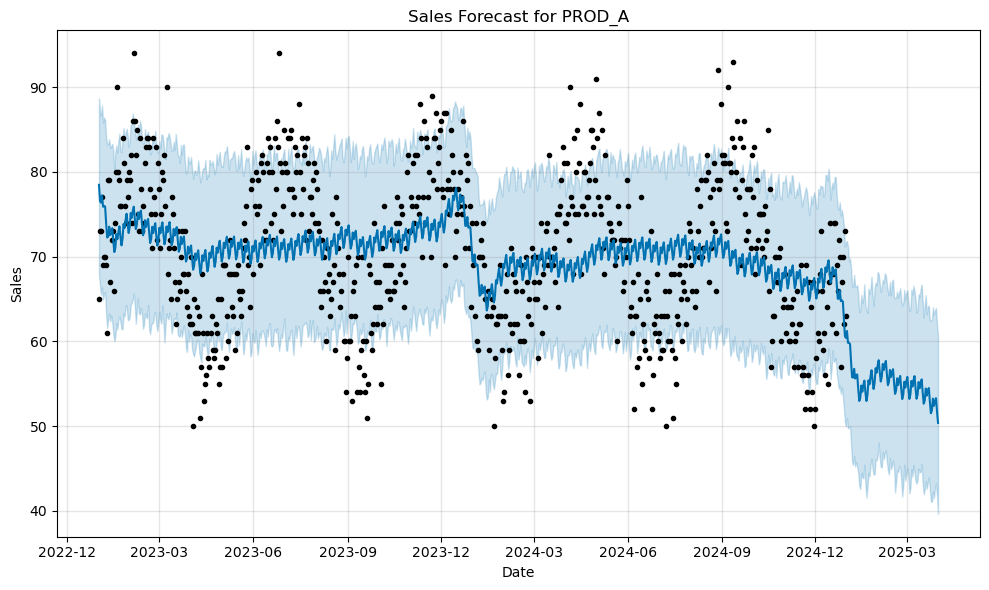

,ds,yhat,yhat_lower,yhat_upper
816,2025-03-27,52.388884,41.500627,63.165349
817,2025-03-28,52.957153,42.652363,63.618865
818,2025-03-29,53.300986,43.246021,63.933214
819,2025-03-30,51.715554,41.737005,61.951414
820,2025-03-31,50.374434,39.656554,60.598662


In [4]:
from prophet import Prophet
import matplotlib.pyplot as plt
product_df = sales_data[sales_data['product_id'] == 'PROD_A'][['date', 'sales']].copy()
product_df = product_df.rename(columns={'date': 'ds', 'sales': 'y'})
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(product_df)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
fig1 = model.plot(forecast)
plt.title("Sales Forecast for PROD_A")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()